In [1]:
import numpy as np
import pandas as pd

In [2]:
import random as rd

In [3]:
kolom_1 = [rd.random()*10 + 5 for i in range(100)]

In [4]:
kolom_1

[13.474051460413188,
 6.8498657816738,
 13.944442429684784,
 8.261930171707979,
 7.909215550062999,
 12.770271247229608,
 6.252944883761535,
 10.662921590857504,
 13.910210544599023,
 11.649057360969843,
 8.24426652509172,
 12.196942163815056,
 8.068544257616459,
 10.4406752468212,
 11.884524803755095,
 10.065074581341214,
 8.895882227314601,
 14.507125709005429,
 14.015917419963365,
 14.78029305259639,
 9.254570484685178,
 12.35676822907341,
 6.544669208277247,
 11.069935066112397,
 5.07510059696095,
 8.642995822735887,
 11.163288270288072,
 6.438212694074283,
 14.658089402319844,
 14.167756449041573,
 9.070248769875109,
 7.810732506326511,
 11.303950665092096,
 9.156962968250156,
 12.680733239030609,
 13.830285962290176,
 7.62849485505366,
 14.191072415232531,
 11.281023811434494,
 13.091707147813208,
 11.053255383470807,
 12.047484381154026,
 7.880959519012637,
 7.305582823247992,
 9.767041225253577,
 7.5610171443012835,
 7.696639660554658,
 7.152271733926719,
 13.806706582917013,
 

In [5]:
kolom_2 = [rd.random()*10 + 5 for i in range(100)]
kolom_2

[12.349602678410765,
 9.825687420262806,
 5.858034111706432,
 6.269234019294593,
 12.984634352886841,
 12.555046761949837,
 10.58237374017003,
 8.292447291679776,
 11.73517376700654,
 8.173716235448826,
 7.256273669240266,
 11.166502554930188,
 11.009674055335832,
 13.401196894760925,
 8.688013012996802,
 8.48252808522422,
 14.7270371415615,
 14.789199228421655,
 8.440792665804896,
 12.116726796616256,
 7.11275750859012,
 13.603799835323226,
 14.565728525094672,
 8.442994715123596,
 10.138061427232511,
 7.797532984790876,
 10.449781229875533,
 9.096377699978499,
 5.730625433261478,
 10.409726549905752,
 12.042985896192572,
 12.916588033026043,
 7.076113386911103,
 9.807687195332496,
 7.490047366067203,
 11.273966538843414,
 7.534486813659823,
 8.395861287330574,
 7.436179238831043,
 12.01835824940057,
 8.970775451659652,
 9.358977765641896,
 11.711109648530936,
 13.172662519809235,
 10.668622830043814,
 9.178621022249164,
 12.644919887484356,
 14.739339359105822,
 6.811268536586866,
 1

In [6]:
target = [rd.randint(0, 1) for i in range(100)]

In [7]:
dummy = {
    'kolom_1': kolom_1,
    'kolom_2': kolom_2,
    'target': target
}

In [8]:
data = pd.DataFrame(dummy)

In [9]:
test_many = [rd.random()*10+5 for i in range(20)]

In [10]:
test = {
    'kolom_1': [rd.random()*10 + 5],
    'kolom_2': [rd.random()*10 + 5]
}

In [11]:
data_test = pd.DataFrame(test)
data_test

,kolom_1,kolom_2
0,9.152219,14.19767


In [12]:
import matplotlib.pyplot as plt

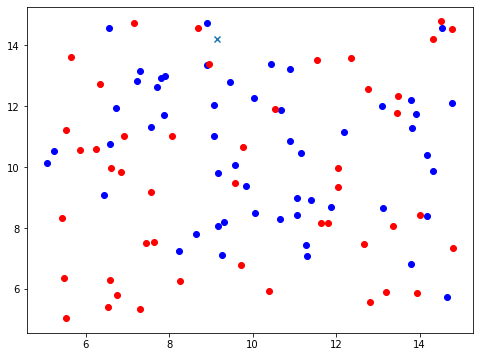

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(data['kolom_1'][data['target'] == 1], data['kolom_2'][data['target'] == 1], c='b')
ax.scatter(data['kolom_1'][data['target'] == 0], data['kolom_2'][data['target'] == 0], c='r')
ax.scatter(data_test['kolom_1'], data_test['kolom_2'], marker='x')
plt.show()

In [14]:
train_arr = np.array(data[['kolom_1', 'kolom_2']])
test_arr = np.array(data_test)

In [15]:
train_arr

array([[13.47405146, 12.34960268],
       [ 6.84986578,  9.82568742],
       [13.94444243,  5.85803411],
       [ 8.26193017,  6.26923402],
       [ 7.90921555, 12.98463435],
       [12.77027125, 12.55504676],
       [ 6.25294488, 10.58237374],
       [10.66292159,  8.29244729],
       [13.91021054, 11.73517377],
       [11.64905736,  8.17371624],
       [ 8.24426653,  7.25627367],
       [12.19694216, 11.16650255],
       [ 8.06854426, 11.00967406],
       [10.44067525, 13.40119689],
       [11.8845248 ,  8.68801301],
       [10.06507458,  8.48252809],
       [ 8.89588223, 14.72703714],
       [14.50712571, 14.78919923],
       [14.01591742,  8.44079267],
       [14.78029305, 12.1167268 ],
       [ 9.25457048,  7.11275751],
       [12.35676823, 13.60379984],
       [ 6.54466921, 14.56572853],
       [11.06993507,  8.44299472],
       [ 5.0751006 , 10.13806143],
       [ 8.64299582,  7.79753298],
       [11.16328827, 10.44978123],
       [ 6.43821269,  9.0963777 ],
       [14.6580894 ,

In [16]:
test_arr

array([[ 9.15221902, 14.19766958]])

In [17]:
delta_sq = (train_arr - test_arr)**2

In [18]:
delta_sq

array([[1.86782357e+01, 3.41535126e+00],
       [5.30083043e+00, 1.91142280e+01],
       [2.29654052e+01, 6.95495197e+01],
       [7.92614231e-01, 6.28600904e+01],
       [1.54505762e+00, 1.47145446e+00],
       [1.30903019e+01, 2.69820972e+00],
       [8.40579051e+00, 1.30703640e+01],
       [2.28222226e+00, 3.48716502e+01],
       [2.26384834e+01, 6.06388562e+00],
       [6.23420171e+00, 3.62880139e+01],
       [8.24377731e-01, 4.81829772e+01],
       [9.27033903e+00, 9.18797352e+00],
       [1.17435099e+00, 1.01633155e+01],
       [1.66011945e+00, 6.34368735e-01],
       [7.46549490e+00, 3.03563155e+01],
       [8.33305278e-01, 3.26628423e+01],
       [6.57085507e-02, 2.80230018e-01],
       [2.86750257e+01, 3.49907328e-01],
       [2.36555621e+01, 3.31416318e+01],
       [3.16752173e+01, 4.33032286e+00],
       [1.04758226e-02, 5.01959790e+01],
       [1.02691356e+01, 3.52681271e-01],
       [6.79931601e+00, 1.35467389e-01],
       [3.67763484e+00, 3.31162828e+01],
       [1.662289

In [19]:
delta_sq.shape[1]

2

In [20]:
(delta_sq[:, 0] + delta_sq[:, 1])**0.5

array([ 4.70038157,  4.94115962,  9.61846791,  7.97826451,  1.73681089,
        3.97347602,  4.63423721,  6.09539765,  5.35745919,  6.52090604,
        7.00052533,  4.29631383,  3.36714515,  1.51475681,  6.14994393,
        5.78758564,  0.58816543,  5.38747928,  7.53639131,  6.00046166,
        7.08565134,  3.2591129 ,  2.63339769,  6.06579901,  5.75354786,
        6.42036266,  4.25335945,  5.77832235, 10.09977451,  6.28523095,
        2.15624231,  1.85492749,  7.43952362,  4.38998495,  7.57909021,
        5.51655235,  6.83518397,  7.68446634,  7.08869251,  4.50210668,
        5.56186672,  5.63874986,  2.79268348,  2.11203805,  3.58220285,
        5.26524186,  2.12831926,  2.07200273,  8.73058846,  0.86151645,
        5.17984369,  4.85944135,  6.80923232,  8.67230788,  4.74260581,
        3.86944421,  9.06439677,  3.18044569,  2.6770458 ,  5.13700103,
        5.98955909,  8.8748538 ,  8.73426407,  4.93199105,  8.37576943,
        9.36633687,  5.06067876,  9.18061939,  4.67720851,  6.94

In [21]:
np.sum(delta_sq, axis=1) == delta_sq[:, 0] + delta_sq[:, 1]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [22]:
test_arr.shape

(1, 2)

In [23]:
def calc_dist(X_target:np.ndarray, X_train:np.ndarray) -> np.ndarray:
    delta_squared = (X_train - X_target)**2
    row_sum = np.sum(delta_squared, axis=1)
    return row_sum**0.5

In [24]:
dist = calc_dist(test_arr, train_arr)

In [25]:
list(data['target'][list(dist.argsort())[:3]].value_counts(normalize=True))

[0.6666666666666666, 0.3333333333333333]

In [26]:
dist[19]

6.000461664537668

In [27]:
test_arr.shape

(1, 2)

In [28]:
delta_sq

array([[1.86782357e+01, 3.41535126e+00],
       [5.30083043e+00, 1.91142280e+01],
       [2.29654052e+01, 6.95495197e+01],
       [7.92614231e-01, 6.28600904e+01],
       [1.54505762e+00, 1.47145446e+00],
       [1.30903019e+01, 2.69820972e+00],
       [8.40579051e+00, 1.30703640e+01],
       [2.28222226e+00, 3.48716502e+01],
       [2.26384834e+01, 6.06388562e+00],
       [6.23420171e+00, 3.62880139e+01],
       [8.24377731e-01, 4.81829772e+01],
       [9.27033903e+00, 9.18797352e+00],
       [1.17435099e+00, 1.01633155e+01],
       [1.66011945e+00, 6.34368735e-01],
       [7.46549490e+00, 3.03563155e+01],
       [8.33305278e-01, 3.26628423e+01],
       [6.57085507e-02, 2.80230018e-01],
       [2.86750257e+01, 3.49907328e-01],
       [2.36555621e+01, 3.31416318e+01],
       [3.16752173e+01, 4.33032286e+00],
       [1.04758226e-02, 5.01959790e+01],
       [1.02691356e+01, 3.52681271e-01],
       [6.79931601e+00, 1.35467389e-01],
       [3.67763484e+00, 3.31162828e+01],
       [1.662289

In [29]:
choiche = [rd.choice([1, 0]) for i in range(100)]
choiche

[1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0]

In [30]:
df = pd.DataFrame(np.array(choiche), columns=['choice'])

In [31]:
dfi = pd.DataFrame(df.value_counts(normalize=True)).reset_index()
dfarr = np.array(dfi).T

In [32]:
dfarr[:, 0]

array([0.  , 0.54])

In [33]:
(delta_sq - np.mean(delta_sq, axis=0))/np.std(delta_sq, axis=0)

array([[ 1.06222348, -0.87204425],
       [-0.39729463, -0.1980993 ],
       [ 1.52996752,  1.96706262],
       [-0.88915558,  1.67988875],
       [-0.80706158, -0.95549477],
       [ 0.45256186, -0.90283078],
       [-0.05853346, -0.45755937],
       [-0.72663453,  0.47835898],
       [ 1.49429929, -0.75834399],
       [-0.29546081,  0.53916276],
       [-0.88569008,  1.0498076 ],
       [ 0.03579157, -0.62422846],
       [-0.84750687, -0.58235752],
       [-0.79450796, -0.99143045],
       [-0.16112275,  0.2845179 ],
       [-0.88471606,  0.38353595],
       [-0.96846334, -1.00663344],
       [ 2.15290555, -1.00364223],
       [ 1.60526587,  0.40409015],
       [ 2.48023615, -0.83276498],
       [-0.97448941,  1.13622477],
       [ 0.14476351, -1.00352315],
       [-0.23380502, -1.01284803],
       [-0.57439052,  0.40300193],
       [ 0.83797913, -0.31116744],
       [-0.94734098,  0.73980385],
       [-0.5343753 , -0.41564717],
       [-0.17199648,  0.09849851],
       [ 2.33178935,

In [34]:
from neighbors._base import NearestNeighbors
from neighbors.classifier import KNNClassifier

In [35]:
knn = KNNClassifier()

In [36]:
def func(x):
    if not x:
        return
    print("true")

In [37]:
x = func(False)

In [38]:
knn.fit(delta_sq, choiche)

In [39]:
knn._output_data

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [46]:
test = np.array([[ 1.51676512, -2.47909951],
       [ 4.92804763, -2.95066551],
       [ 2.25077705,  0.92468329],
       [ 1.25077705,  0.92468329]
       ])

In [41]:
test[0].shape

(2,)

In [47]:
knn.predict(test)

[0.]
[0. 1.]
[0. 1. 0.]
[0. 1. 0. 0.]


array([0., 1., 0., 0.])

In [43]:
for cls in np.unique(knn._output_data):
    print(cls)

0
1


In [44]:
out = knn._predict_proba(test, axis=0)

TypeError: KNNClassifier._predict_proba() got an unexpected keyword argument 'axis'

In [ ]:
out

array([[0.        , 1.        ],
       [0.66666667, 0.33333333]])

In [ ]:
np.argmax(out[1, :])

0

In [ ]:
out[0, np.argmax(out[1, :])]

0.0

In [ ]:
x = np.array([])
np.append(x, [1])

array([1.])

In [ ]:
pd.DataFrame(out).value_counts(normalize=True).get('yes', 0)

: 

In [ ]:
x=np.array(choiche)

: 

: 

In [ ]:
set(x.tolist())

: 

In [ ]:
outt = np.zeros(shape=(2, 3))

: 

In [ ]:
outt[0, 0] = 5

: 

In [ ]:
outt[0, :]

: 

In [ ]:
import hashlib

: 

: 

In [ ]:
hashlib.sha256("hello world".encode()).hexdigest()

: 

In [ ]:
hashlib.sha256("hello world-rahmanazizf".encode()).hexdigest()

: 

In [ ]:
rd.choices(asc)

: 

In [ ]:
import string

: 

In [ ]:
string.ascii_letters

: 

In [ ]:
string.digits

: 

In [ ]:
"".join(rd.choices(string.ascii_letters+string.digits, k=5))

: 